# Best practices in data visualization - ASPP 2022, Bilbao
## Exercise 2 - Which visualization should I use? 

In this exercise you get a dataset of the human development index (HDI) for different countries around the world over the years. The HDI is a measure of 'how developed' a country is. It depends on how rich the country is, but also on other factors such as life expectancy and education. This dataset contains several other variables that are interesting and could relate somehow to the HDI. **Your job is to visualize possible relationships and in this way answer some questions (see below)**. 

Here a short description of each column in the dataset

- *Country, Year*, Region are self-explanatory
- *GDP per capita*: gross domestic product of a country per inhabitant. It is considered a measure of how rich a country is.
- *Expenditure on health/education/social protection*: percentage of public spending destined to those sectors
- *HDI*: human development index
- *Code*: three letter country code
- *Global*: Whether the country belongs to the so called 'Global North' or 'Global South'

Note that this dataset is incomplete as it does not contain data of *all* the countries in the world.

Sources: [ourworldindata.org](https://ourworldindata.org/human-development-index)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# matplotlib comes alread with a set of stylesheets. 
# here we use one of the default sheets from *seaborn*, another python visualization library based on matplotlib.
# for more styles see: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('seaborn-darkgrid')

In [2]:
# we use pandas to read the dataset on a table
df = pd.read_csv('data/hdi_data.csv')
df

,Country,Year,Expenditure on health,Expenditure on education,Expenditure on social protection,HDI,Code,GDP per capita,Region,Global
0,Afghanistan,2006,1.387150,4.684761,0.887695,0.429,AFG,1315.789063,Asia & Pacific,Global South
1,Afghanistan,2007,2.376418,4.174895,1.357564,0.447,AFG,1460.825806,Asia & Pacific,Global South
2,Afghanistan,2008,2.313319,4.383672,1.787371,0.447,AFG,1484.114502,Asia & Pacific,Global South
3,Afghanistan,2009,2.222690,4.810640,1.211468,0.460,AFG,1758.904419,Asia & Pacific,Global South
4,Afghanistan,2010,2.562634,5.383646,5.380668,0.472,AFG,1957.029053,Asia & Pacific,Global South
...,...,...,...,...,...,...,...,...,...,...
1070,Uzbekistan,2015,2.365495,5.660089,6.987072,0.701,UZB,6401.115234,Asia & Pacific,Global South
1071,Uzbekistan,2016,2.284768,5.567202,6.612210,0.705,UZB,6663.949707,Asia & Pacific,Global South
1072,Uzbekistan,2017,2.137274,5.079615,6.158300,0.713,UZB,6840.709961,Asia & Pacific,Global South
1073,Uzbekistan,2018,2.215873,5.162037,6.040904,0.717,UZB,7082.925293,Asia & Pacific,Global South


#### How to get data from one column

In [3]:
# You can get the values of one column in this way, returning a numpy array
df['GDP per capita'].values

array([1315.789063, 1460.825806, 1484.114502, ..., 6840.709961,
       7082.925293, 7348.146973])

In [4]:
# for the categorical variables you can get it also as a numpy array, of type 'object'
df['Country'].values

array(['Afghanistan', 'Afghanistan', 'Afghanistan', ..., 'Uzbekistan',
       'Uzbekistan', 'Uzbekistan'], dtype=object)

#### How to filter data 

In [5]:
# you can filter the data in this way. Say you are only interested in country 'Germany'. Then you select 
# only the rows where that is true with df[df['colname'] == value]
df[df['Country']=='Italy']

,Country,Year,Expenditure on health,Expenditure on education,Expenditure on social protection,HDI,Code,GDP per capita,Region,Global
494,Italy,2000,5.822734,4.336241,16.782265,0.838,ITA,43053.93359,Europe,Global North
495,Italy,2001,6.131799,4.417285,16.585233,0.845,ITA,43869.42969,Europe,Global North
496,Italy,2002,6.247251,4.438759,16.243340,0.850,ITA,43915.38672,Europe,Global North
497,Italy,2003,6.252702,4.544670,17.057517,0.855,ITA,43781.21875,Europe,Global North
498,Italy,2004,6.583200,4.320473,17.114984,0.860,ITA,44118.03516,Europe,Global North
499,Italy,2005,6.822216,4.443763,17.178628,0.865,ITA,44260.82813,Europe,Global North
500,Italy,2006,6.900167,4.372923,17.253767,0.870,ITA,44918.17188,Europe,Global North
501,Italy,2007,6.680224,4.420460,17.399422,0.874,ITA,45356.53516,Europe,Global North
502,Italy,2008,7.009526,4.286164,17.974354,0.876,ITA,44623.60156,Europe,Global North
503,Italy,2009,7.420609,4.529398,19.722607,0.876,ITA,42074.92188,Europe,Global North


## Exercises

*teacher notes*:
- *A: visualizing distribution of a variable - prototype: histogram.*
- *B: relationship between two variables - prototype: scatterplot.*
- *C: relationship between more than two variables - prototype: scatterplot + panels or colors*
- *D: variable over time - prototype: lineplot. different panels*
- *E: comparing groups - prototype: barplots. if needed color, but to be chosen correctly: categorical palette*

### A: How is the HDI distributed? normally distributed, or skewed?

*Teacher notes: students are asked to visualize the distribution of one variable: histogram.* 

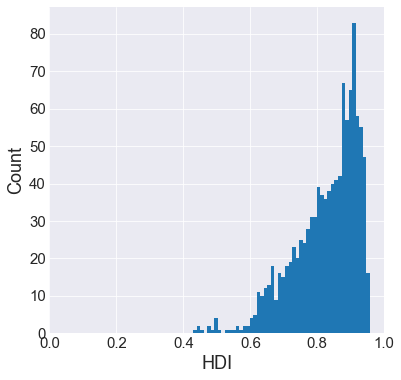

In [6]:
hdi = df['HDI'].values

fig, ax = plt.subplots(figsize=(6, 6))
n, bins, patches = ax.hist(hdi, bins=50)
ax.set_xlim(0,1)
ax.set_xlabel('HDI', fontsize=18)
ax.set_ylabel('Count', fontsize=18)
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)

### B: Is there a relationship between GDP per capita and HDI? is this relationship different for different regions of the world? 

*Teacher note: relationship of two variables: scatterplot, color or panels for different regions*

In [7]:
hdi = df['HDI'].values
gdp = df['GDP per capita'].values/1000

### - visualizing all data

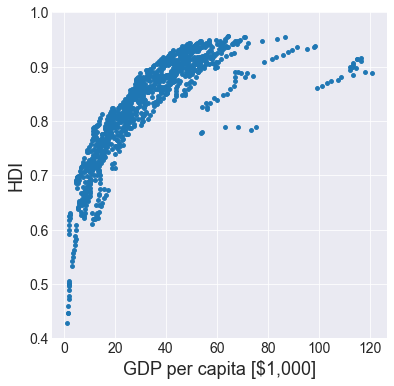

In [8]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(gdp, hdi, s=15)
ax.set_ylim(0.4,1)
ax.set_xlabel('GDP per capita [$1,000]', fontsize=18)
ax.set_ylabel('HDI', fontsize=18)
ax.tick_params(axis='x', labelsize= 14)
ax.tick_params(axis='y', labelsize= 14)

### - visualizing per region

In [9]:
region = df['Region'].values

# chossing an appropiate color palette: categorical palette from ColorBrewer
unique_regions = set(region)
p = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#e6ab02']
region_palette = dict(zip(unique_regions, p))
region_palette 
colors = [region_palette[r] for r in region]


Text(1, 0.8, 'visualization not optimal!')

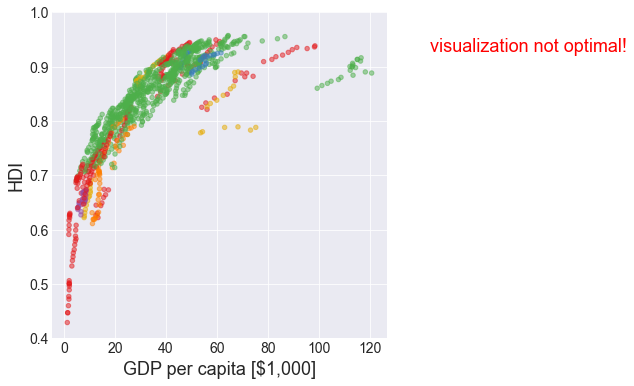

In [10]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(gdp, hdi, s=20, c=colors, alpha=0.5)
ax.set_ylim(0.4,1)
ax.set_xlabel('GDP per capita [$1,000]', fontsize=18)
ax.set_ylabel('HDI', fontsize=18)
ax.tick_params(axis='x', labelsize= 14)
ax.tick_params(axis='y', labelsize= 14)
fig.text(1, 0.8, 'visualization not optimal!', va='center', ha='left', fontsize=18, color='red')

Why is this visualization not optimal? 

A: First, because it doesn't have a legend, so we do not know which colors correspond to what. But most importantly, even if there were a legend, the graph is not optimal because there is a lot of clutter. Many points are overlapping and even though we can see the overall trend, we cannot distinguish the different groups, which are color coded. We need to separate the data in different panels.

Text(0.075, 0.5, 'HDI')

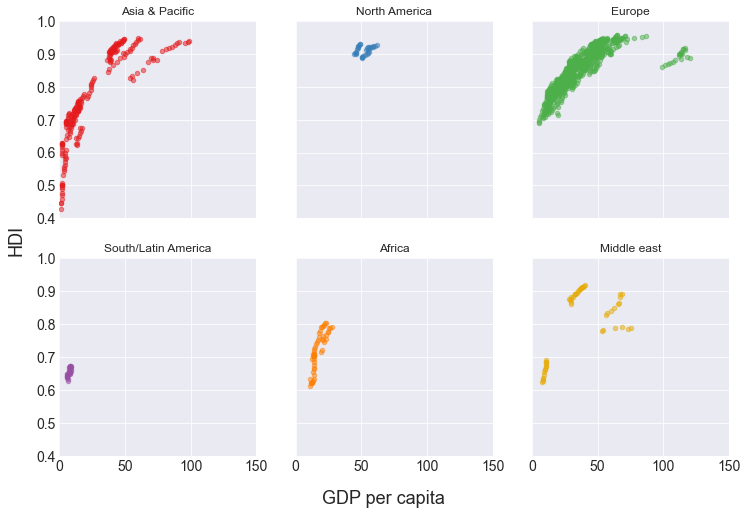

In [11]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
ax = ax.ravel()
for i, r in enumerate(unique_regions):
    idx = region==r
    ax[i].scatter(gdp[idx], hdi[idx], s=20, c=region_palette[r], alpha=0.5)
    ax[i].set_title(r)
    ax[i].set_ylim(0.4,1)
    ax[i].set_xlim(0, 150)
    ax[i].tick_params(axis='x', labelsize= 14)
    ax[i].tick_params(axis='y', labelsize= 14)

    if i!=0 and i!=3:
        ax[i].set_yticklabels([])
    if i<3:
        ax[i].set_xticklabels([])

fig.text(0.5, 0.05, 'GDP per capita', va='center', ha='center', fontsize=18)
fig.text(0.075, 0.5, 'HDI', va='center', ha='center', fontsize=18, rotation=90)


### C: Is expenditure on education or health correlated with the HDI *and* GDP?

Can you visualize the three variables at once? HDI, expenditure in health or education and GDP? 
First think (even better, make a sketch) of the different possibilities you have. Then implement the one you think its clearer here below.

In [12]:
education = df['Expenditure on education'].values
health = df['Expenditure on health'].values
print(education) # values in %

[4.68476067 4.17489535 4.38367211 ... 5.07961548 5.16203719 6.76969616]


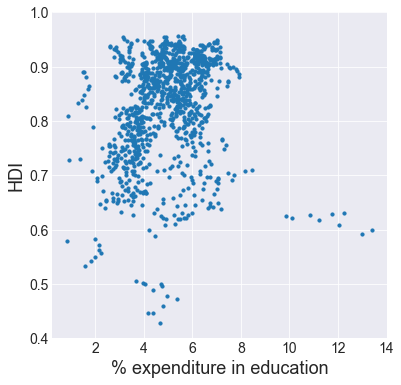

In [13]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(education, hdi, s=10)
ax.set_ylim(0.4,1)
ax.set_xlabel('% expenditure in education', fontsize=18)
ax.set_ylabel('HDI', fontsize=18)
ax.tick_params(axis='x', labelsize= 14)
ax.tick_params(axis='y', labelsize= 14)

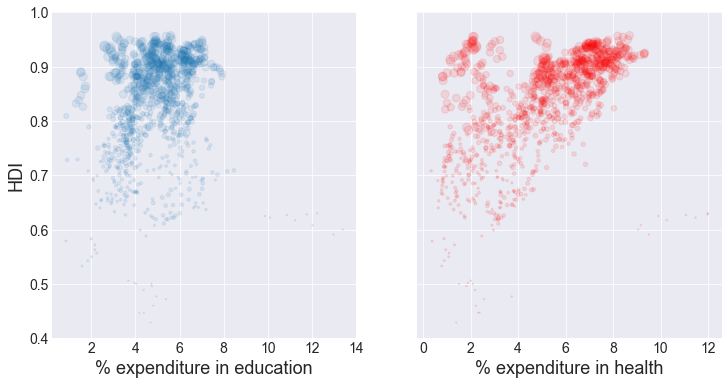

In [14]:
# now also visualize a third variable, GDP, as the size of the markers
fig, ax = plt.subplots(1,2, figsize=(12, 6))
ax[0].scatter(education, hdi, s=gdp, alpha=0.1)
ax[0].set_ylim(0.4,1)
ax[0].set_xlabel('% expenditure in education', fontsize=18)
ax[0].set_ylabel('HDI', fontsize=18)
ax[0].tick_params(axis='x', labelsize= 14)
ax[0].tick_params(axis='y', labelsize= 14)

ax[1].scatter(health, hdi, s=gdp, alpha=0.1, c='red')
ax[1].set_ylim(0.4,1)
ax[1].set_xlabel('% expenditure in health', fontsize=18)
ax[1].set_yticklabels([])
ax[1].tick_params(axis='x', labelsize= 14)
ax[1].tick_params(axis='y', labelsize= 14)



### D: are countries getting richer, i.e. is their GDP growing over time? 

You can visualize some countries relevant for you, or randomly pick some, say ten of them.

*Teacher notes: composition / change over time. x-axis:time, y-axis: HDI (dependent variable), panels or colors: some countries*
*- for summary, they could calculate an average or normalized average*

In [15]:
# here we will visualize 10 different countries, picked at random
unique_countries = df['Country'].unique()
countries = np.random.choice(unique_countries, size=10, replace=False)
countries.sort()
print(countries)

['Belarus' 'Estonia' 'France' 'Georgia' 'Greece' 'Kiribati' 'Myanmar'
 'Singapore' 'Switzerland' 'Turkey']


Text(0.05, 0.5, 'GDP per capita [$K]')

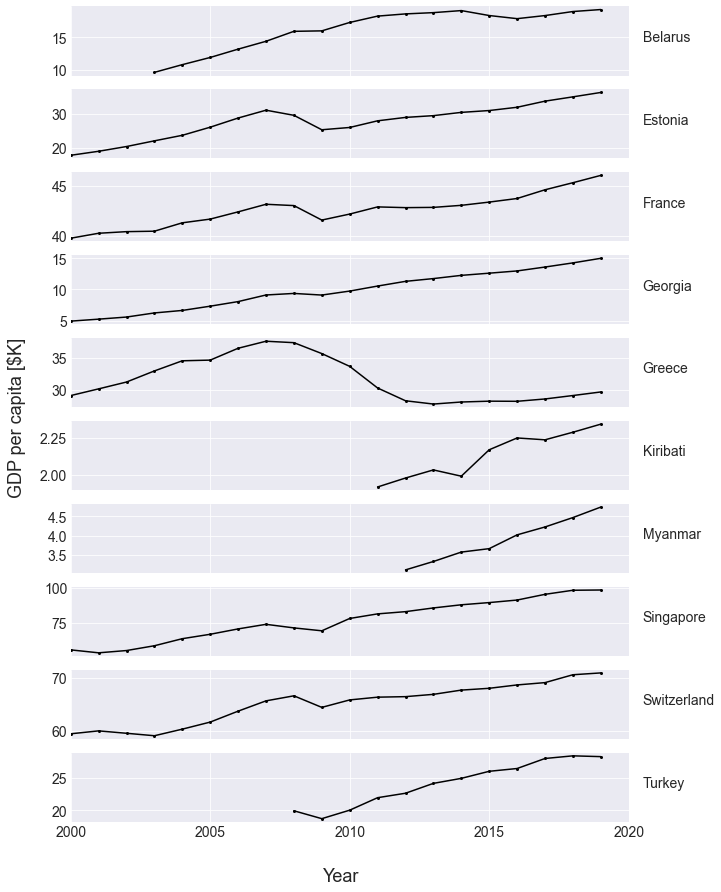

In [16]:
fig, ax = plt.subplots(10, 1, figsize=(10, 15))
for i, c in enumerate(countries):
    # getting the values for each panel
    data = df[df['Country']==c]
    gdp = data['GDP per capita'].values/1000
    year = data['Year'].values
    
    ax[i].plot(year, gdp, c='k', marker='o', markersize=2)
    ax[i].set_xlim(2000, 2019)
    ax[i].set_xticks([2000, 2005, 2010, 2015, 2020])
    if i==9:
        ax[i].set_xticklabels([2000, 2005, 2010, 2015, 2020])
    else:
        ax[i].set_xticklabels([])
        ax[i].spines['bottom'].set_visible(False)
        
    ax[i].tick_params(axis='x', labelsize= 14)
    ax[i].tick_params(axis='y', labelsize= 14)
    xy=(year[-1], gdp[-1]) # coordinates of the point to annotate. we annotate the last one
    xytext = (2020.5, (gdp.max() + gdp.min())/2) # coordinates where text will be displayed. midway between max and min
    ax[i].annotate(c, xy=xy,  xytext=xytext, fontsize=14)
    
        
fig.text(0.5, 0.075, 'Year', va='center', ha='center', fontsize=18)
fig.text(0.05, 0.5, 'GDP per capita [$K]', va='center', ha='center', fontsize=18, rotation=90)

### E: According to this dataset, which is - on average - the less developed region? Visualize the fact that the Global North is more developed than the Global South.

Consider that your message is simple, comparing regions. Which kind of plot is better at comparing categorial entities?

*Teacher notes: do barplots* 

In [17]:
hdi_north = df[df['Global']=='Global North']['HDI'].values
hdi_south = df[df['Global']=='Global South']['HDI'].values

hdi_asia = df[df['Region']=='Asia & Pacific']['HDI'].values
hdi_europe = df[df['Region']=='Europe']['HDI'].values
hdi_latam = df[df['Region']=='South/Latin America']['HDI'].values
hdi_northam = df[df['Region']=='North America']['HDI'].values
hdi_middleeast = df[df['Region']=='Middle east']['HDI'].values
hdi_africa = df[df['Region']=='Africa']['HDI'].values

In [18]:
# calculating averages for each region
hdi_mean_asia = np.mean(hdi_asia)
hdi_mean_europe = np.mean(hdi_europe)
hdi_mean_latam = np.mean(hdi_latam)
hdi_mean_northam = np.mean(hdi_northam)
hdi_mean_middleeast = np.mean(hdi_middleeast)
hdi_mean_africa = np.mean(hdi_africa)

hdi_mean_north = np.mean(hdi_north)
hdi_mean_south = np.mean(hdi_south)

hdi_sd_north = np.std(hdi_north)
hdi_sd_south = np.std(hdi_south)


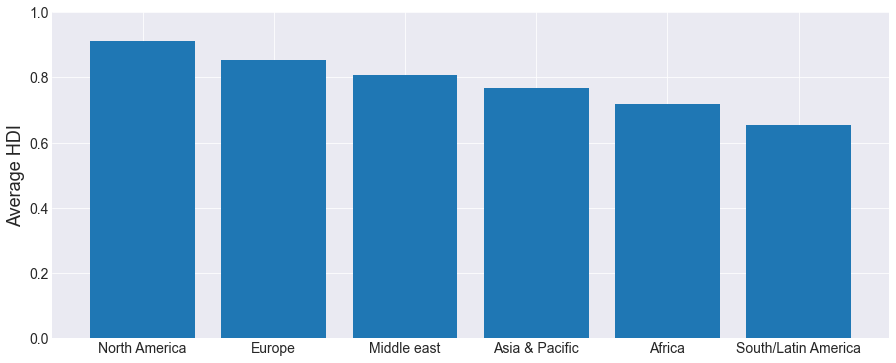

In [19]:
# The CLASSIC
countries = ['North America',
             'Europe', 
             'Middle east',
             'Asia & Pacific',  
             'Africa', 
             'South/Latin America']

values = [hdi_mean_northam,
          hdi_mean_europe, 
          hdi_mean_middleeast,
          hdi_mean_asia,
          hdi_mean_africa,
          hdi_mean_latam]

fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(x=countries, height=values)

ax.set_ylabel('Average HDI', fontsize=18)
ax.set_ylim((0,1))
ax.tick_params(axis='x', labelsize= 14)
ax.tick_params(axis='y', labelsize= 14)


Text(0.5, 0, 'HDI')

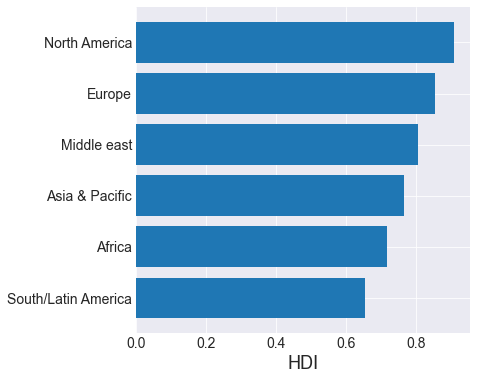

In [20]:
# improvement from the classic -> horizontal barplot, ordered by decreasing value
y_pos = np.arange(len(countries))

fig, ax = plt.subplots(figsize=(6, 6))
ax.barh(y_pos, values, align='center')
ax.tick_params(axis='x', labelsize= 14)
ax.set_yticks(y_pos, labels=countries, fontsize=14)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('HDI', fontsize=18)


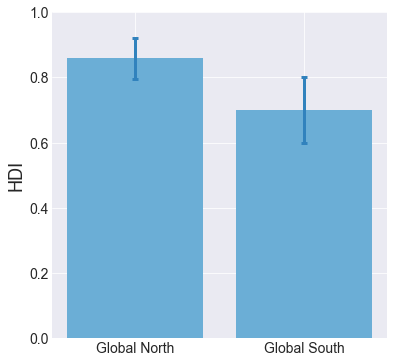

In [21]:
# visualizing global north vs. global south, with a bar plot + error bars depicting the standard dev.
fig, ax = plt.subplots(figsize=(6, 6))
ax.bar(x=['Global North', 'Global South'], 
       height=[hdi_mean_north, hdi_mean_south], 
       yerr = [hdi_sd_north, hdi_sd_south],
       color='#6baed6',
       error_kw=dict(ecolor="#3182bd", linewidth=3, capsize=3, capthick=3))

ax.set_ylabel('HDI', fontsize=18)
ax.set_ylim((0,1))
ax.tick_params(axis='x', labelsize= 14)
ax.tick_params(axis='y', labelsize= 14)
